In [1]:
%matplotlib notebook
import os
import time
from math import sqrt, pi
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pylab as plt
from pylab import scatter, plot, axes, cm, hist, show, title

import batch_clustering

import warnings
warnings.filterwarnings("ignore")

from ipyparallel import Client

voronoi clustering for file run15 wtTNF.csv
Monte Carlo simulation in ROI roi_00


<IPython.core.display.Javascript object>


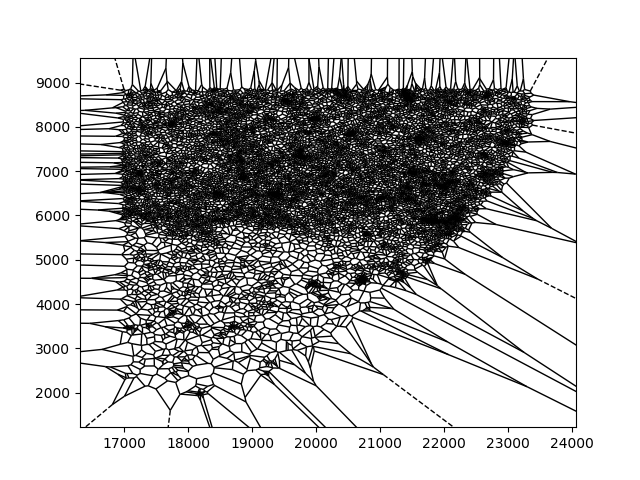

2.5758293035489004


<IPython.core.display.Javascript object>


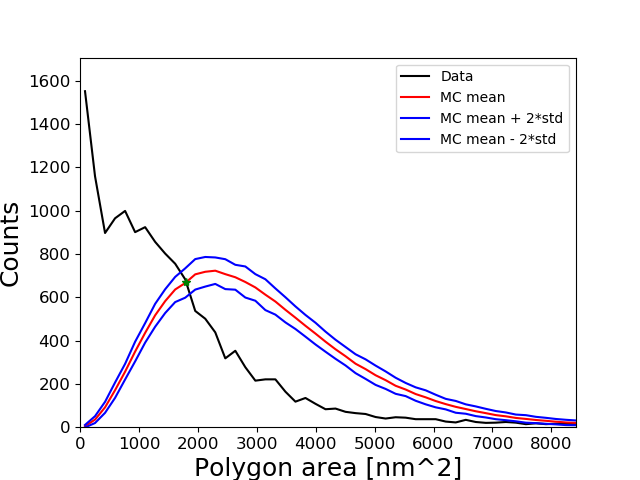

Monte Carlo simulation in ROI roi_01


<IPython.core.display.Javascript object>


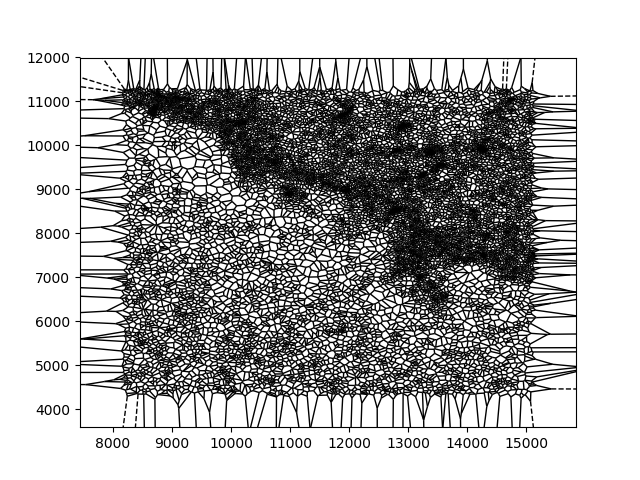

2.5758293035489004


<IPython.core.display.Javascript object>


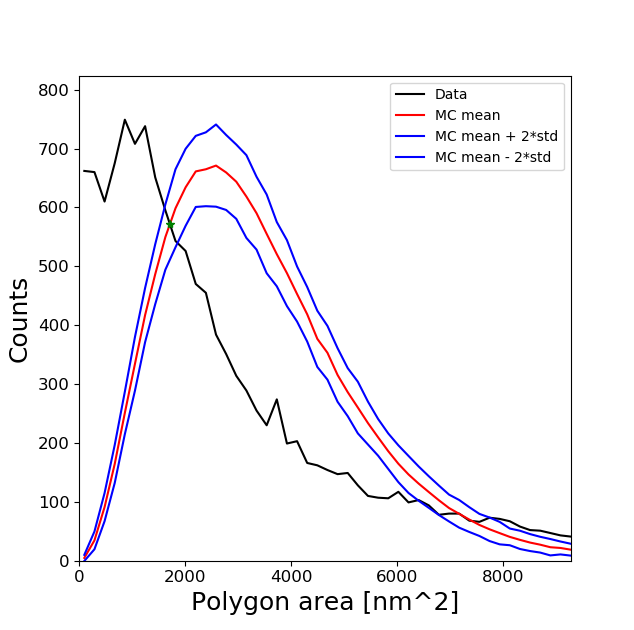

Monte Carlo simulation in ROI roi_02


<IPython.core.display.Javascript object>


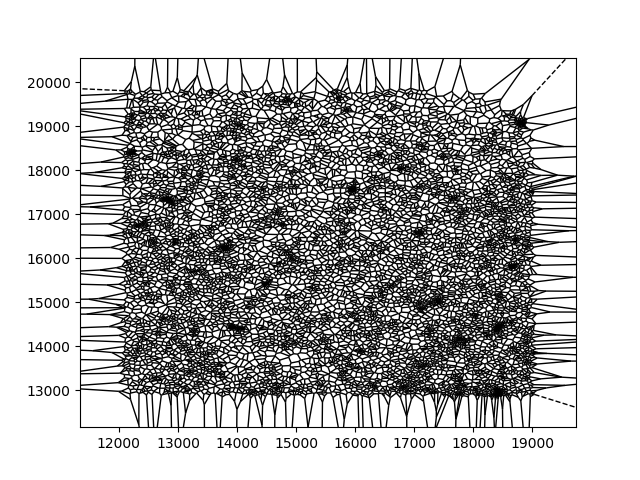

2.5758293035489004


<IPython.core.display.Javascript object>


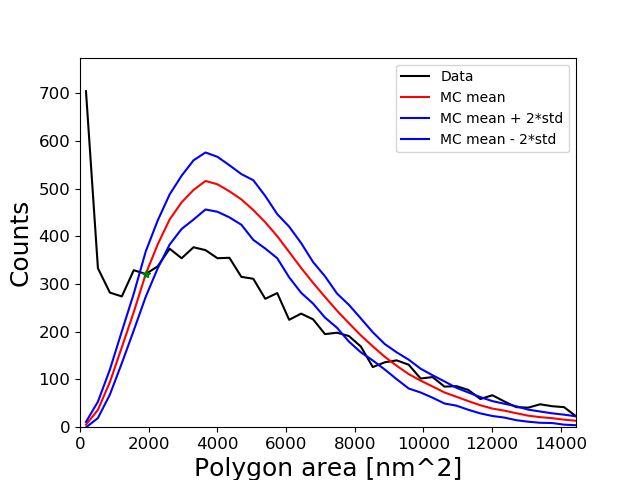

Monte Carlo simulation in ROI roi_03


<IPython.core.display.Javascript object>


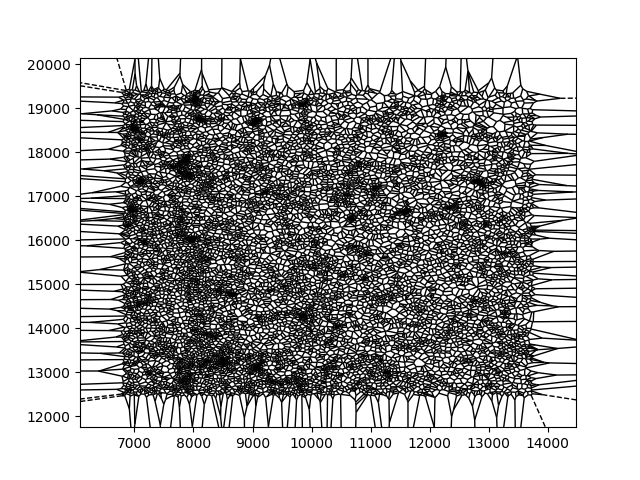

2.5758293035489004


<IPython.core.display.Javascript object>


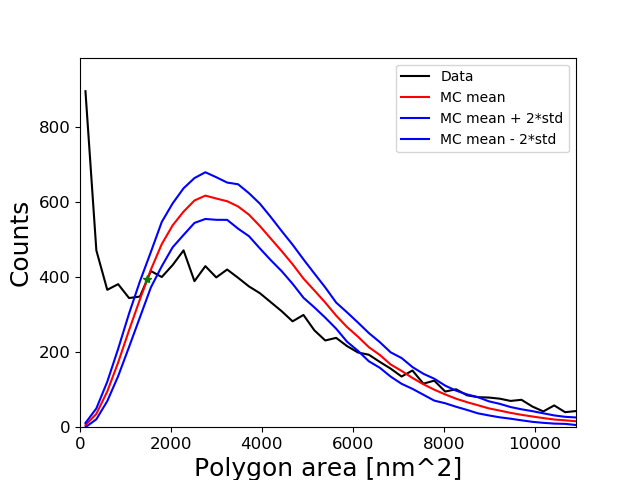

Monte Carlo simulation in ROI roi_04


<IPython.core.display.Javascript object>


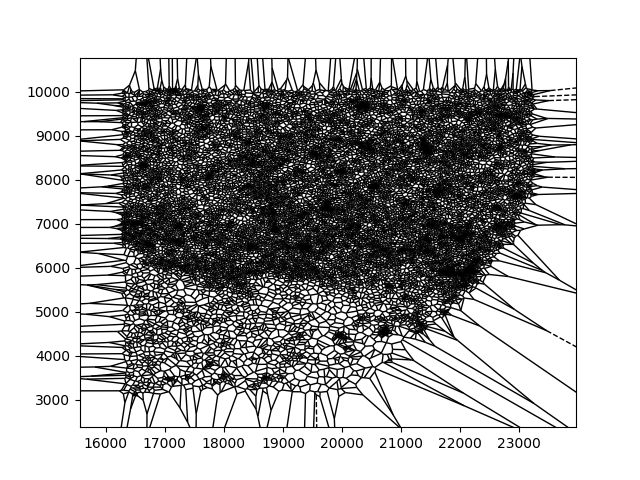

2.5758293035489004


<IPython.core.display.Javascript object>


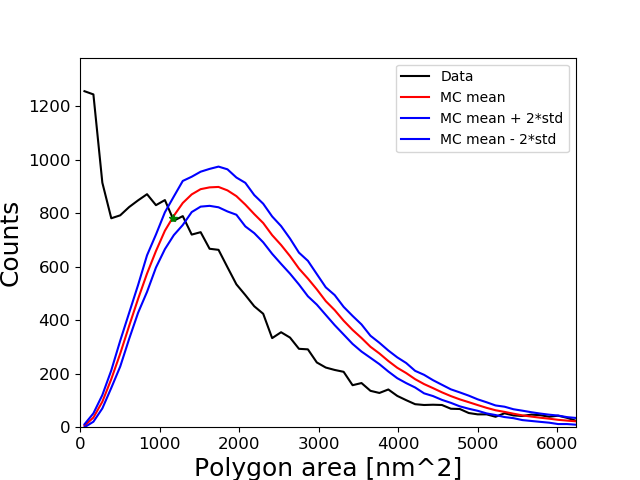

density_factor: {'image': 3.2168787339836027}
Min density 0.34165007433765976
Max density 5.056021227786806e-09
Median density 0.0004752318646777063
intersection: 1614.0582575269946
density threshold: 0.0006195563235320676
density_factor: 3.2168787339836027
<class 'dict'>
n_locs in voronoi_clustering: 110935
ave density: 0.0001925954861111111
n_locs: 110935
<class 'dict'>
n_locs in voronoi_clustering: 110935
ave density: 0.00020968620037807183
n_locs: 110935


<IPython.core.display.Javascript object>


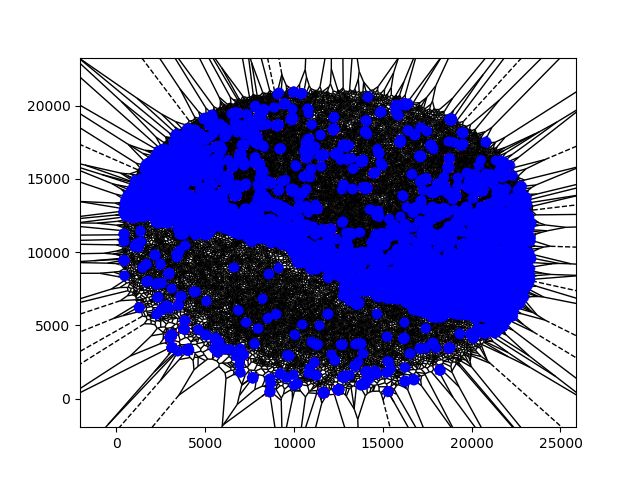

In [2]:
parameters = {}
parameters['pixel_size'] = 16.0 #nm
parameters['object_min_samples'] = 3
parameters['object_density_factor'] = 4.213
parameters['cluster_min_samples'] = 3
parameters['cluster_density_factor'] = 20
parameters['conditions'] = ['wtTNF']
parameters['cluster_area_filter'] = 30.0
parameters['input_dir'] = "test_data"
parameters['output_dir'] = "test_data\\processed"
parameters['data_source'] = 'thunderstorm'
batch_clustering.run_voronoi_segmentation(parameters, use_roi=False, segment_rois=False, show_plot=True)

In [4]:
path = root_dir + 'filtered\\run10StormTableLeftB wtTNF_filtered.csv'
locs = pd.read_csv(path)

In [5]:
from read_roi import read_roi_file
from read_roi import read_roi_zip

pixel_size = 16.0
roi_path = root_dir + 'filtered\\run10StormTableLeftB wtTNF_filtered_roiset.zip'
rois = read_roi_zip(roi_path)
roi_locs = {}
for roi_id, roi in rois.items():
    for k, v in roi.items():
        if not isinstance(v, str):
            roi[k] = float(v) * pixel_size
            
    roi_locs[roi_id] = locs[(locs['x [nm]'] > roi['left']) &
                            (locs['x [nm]'] < roi['left'] + roi['width']) &
                            (locs['y [nm]'] > roi['top']) &
                            (locs['y [nm]'] < roi['top'] + roi['height'])].reset_index(drop=True)

n_locs 4717
image area 44083276.35661534
Creating Voronoi object.
Calculating 2D region sizes.
Processing point 0
Min density 0.13078261859110402
Max density 2.5159146784636594e-10
Median density 0.0005855794538367995
ave image density 0.00010700202865688645
Calculating neighbors
Marking connected regions


<IPython.core.display.Javascript object>


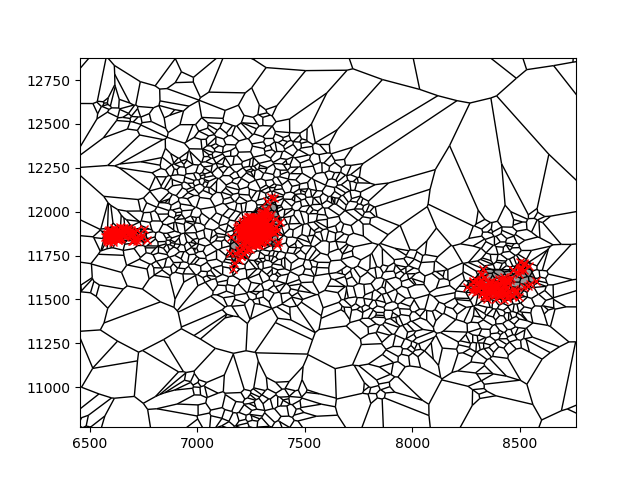

3 clusters


In [7]:
from cluster.voronoi_ import voronoi

locs_df = voronoi(roi_locs['0761-0361'], 90, 50, show_plot=True)


<IPython.core.display.Javascript object>


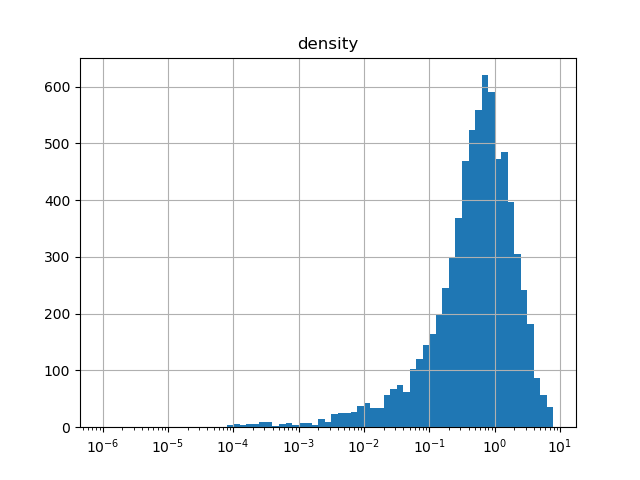

In [15]:
fig, ax = plt.subplots()
bins = 10**(np.arange(-6, 1, 0.1))
locs_df.hist('density', ax=ax, bins=bins)
ax.set_xscale('log')

In [8]:
srt_density = pd.read_table(root_dir + 'LocalDensity.txt', header=None)

<IPython.core.display.Javascript object>


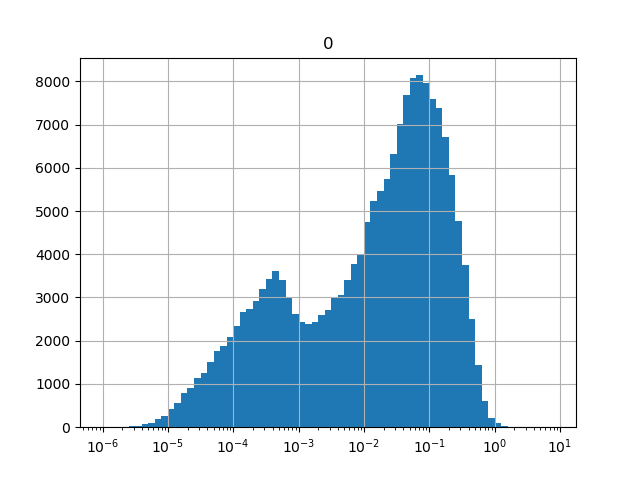

In [13]:
fig, ax = plt.subplots()
bins = 10**(np.arange(-6, 1, 0.1))
srt_density.hist(ax=ax, bins=bins)
ax.set_xscale('log')
# ax.set_yscale('log')

In [13]:
locs_df['density'].min()

3.6169472414945573e-06

In [3]:
# batch processing
# roi_path = root_dir + 'test\\hawk run09 wtTNF_filtered_roiset.zip'
batch_clustering.run_optics(parameters, verbose=False)   

optics clustering for file run01StormTableLeftB wtTNF_filtered.csv
optics clustering for file run02StormTableLeftB wtTNF_filtered.csv
optics clustering for file run03StormTableLeftB wtTNF_filtered.csv
optics clustering for file run05StormTableLeftB wtTNF_filtered.csv
optics clustering for file run06StormTableLeftB wtTNF_filtered.csv
optics clustering for file run07StormTableLeftB wtTNF_filtered.csv
optics clustering for file run08StormTableLeftB wtTNF_filtered.csv
optics clustering for file run09StormTableLeftB wtTNF_filtered.csv
optics clustering for file run10StormTableLeftB wtTNF_filtered.csv
optics clustering for file run11StormTableLeftB control_filtered.csv
optics clustering for file run12StormTableLeftB control_filtered.csv
optics clustering for file run13StormTableLeftB control_filtered.csv
optics clustering for file run14StormTableLeftB control_filtered.csv
optics clustering for file run15StormTableLeftB control_filtered.csv
optics clustering for file run16StormTableLeftB cont

.zip


<IPython.core.display.Javascript object>


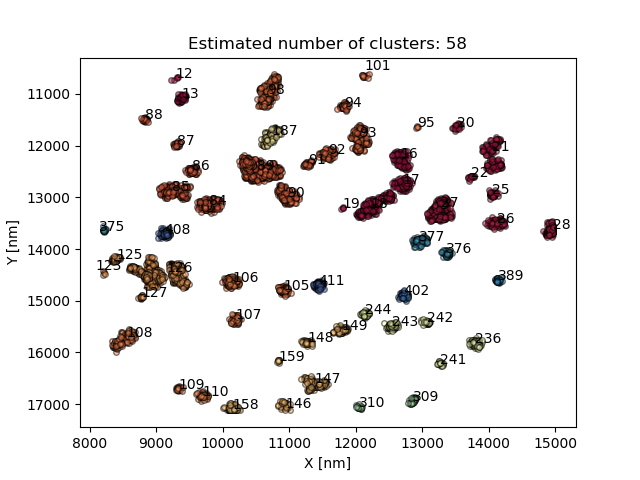

<IPython.core.display.Javascript object>


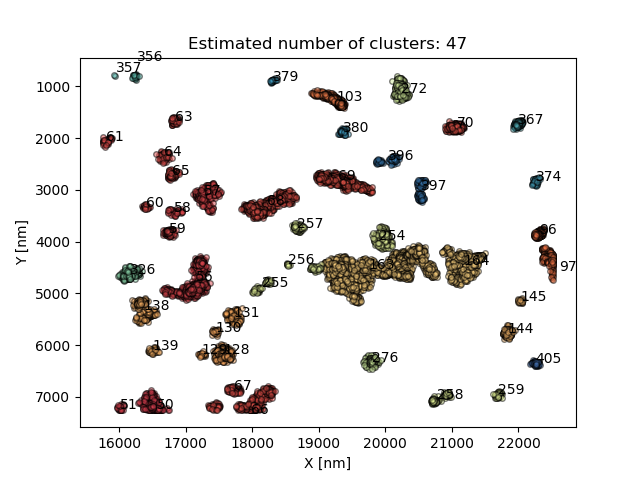

<IPython.core.display.Javascript object>


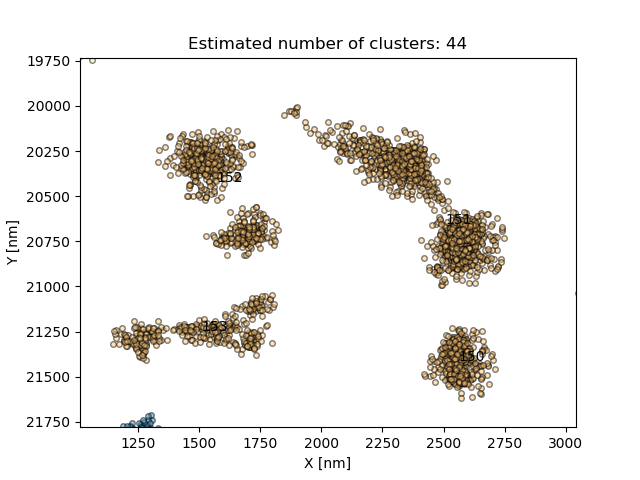

In [2]:
from cluster import utils
root_dir = 'C:\\Users\\NIC ADMIN\\Documents\\atto647n pre-hawk\\'
path = root_dir + 'processed\\run01StormTableLeftB wtTNF_filtered_optics.xlsx'
roi_path = root_dir + 'filtered\\run01StormTableLeftB wtTNF_filtered_roiset.zip'
cluster_list = utils.import_clusters(path, sheetname='image')
utils.plot_clusters_in_roi(roi_path, 16.0, cluster_list, noise=cluster_list.noise)

TNF
5min_TNF5 filtered only_optics.xlsx
5min_TNF1 filtered only_optics.xlsx
5min_TNF3 filtered only_optics.xlsx
starve
starve5 filtered only_optics.xlsx
starve1 filtered only_optics.xlsx
starve3 filtered only_optics.xlsx
starve4 fitlered only_optics.xlsx


<IPython.core.display.Javascript object>


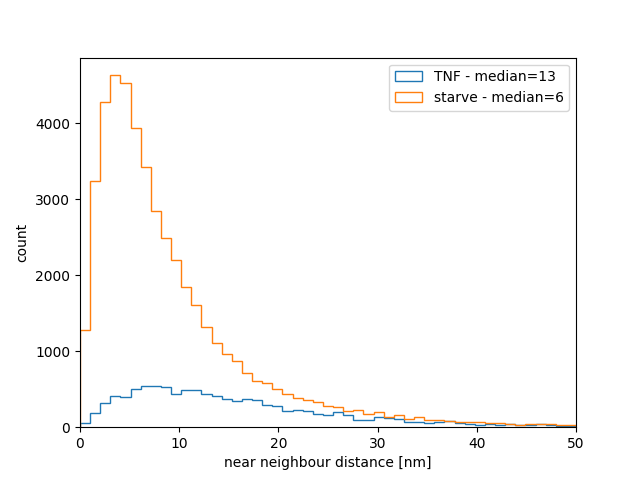

In [38]:
wt_nn = cluster_near_neighbours(output_dir,'TNF','optics')
starve_nn = cluster_near_neighbours(output_dir,'starve','optics')

plt.figure()
bins = np.linspace(0, 50, 50)
plt.hist(
    wt_nn['Distance [nm]'].values, 
    bins=bins,
    label='TNF - median=%d'%wt_nn['Distance [nm]'].median(),
    normed=False,
    histtype='step')

plt.hist(
    starve_nn['Distance [nm]'].values,
    bins=bins,
    label='starve - median=%d'%starve_nn['Distance [nm]'].median(),
    normed=False,
    histtype='step')

plt.xlim([0,50])
plt.legend()
plt.xlabel('near neighbour distance [nm]')
plt.ylabel('count')
plt.savefig(os.path.join(output_dir,'collated_cluster_near_neighbours.png'))
plt.show()

In [41]:
from scipy.stats import ks_2samp
ks_2samp(wt_nn['Distance [nm]'].values, wt_nn['Distance [nm]'].values)

Ks_2sampResult(statistic=0.0, pvalue=1.0)

TNF
5min_TNF5 filtered only_optics.xlsx
5min_TNF1 filtered only_optics.xlsx
5min_TNF3 filtered only_optics.xlsx
starve
starve5 filtered only_optics.xlsx
starve1 filtered only_optics.xlsx
starve3 filtered only_optics.xlsx
starve4 fitlered only_optics.xlsx


<IPython.core.display.Javascript object>


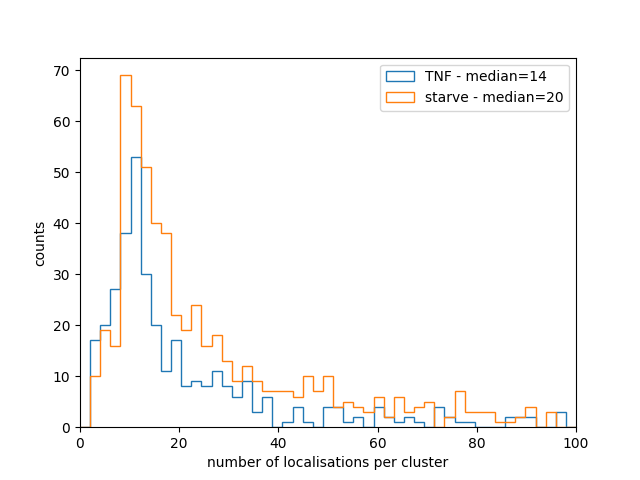

In [65]:
wt_clust_stats = collate_dataset_stats(output_dir,'TNF','optics','cluster statistics')
starve_clust_stats = collate_dataset_stats(output_dir,'starve','optics','cluster statistics')
plt.figure()
bins = np.linspace(0, 100, 50)
plt.hist(
    wt_clust_stats['size'].values, 
    bins=bins,
    label='TNF - median=%d'%wt_clust_stats['size'].median(),
    normed=False,
    histtype='step')

plt.hist(
    starve_clust_stats['size'].values,
    bins=bins,
    label='starve - median=%d'%starve_clust_stats['size'].median(),
    normed=False,
    histtype='step')

plt.xlim([0,100])
plt.legend()
plt.xlabel('number of localisations per cluster')
plt.ylabel('counts')
plt.savefig(os.path.join(output_dir,'collated_cluster_num_molecules.png'))
plt.show()


<IPython.core.display.Javascript object>


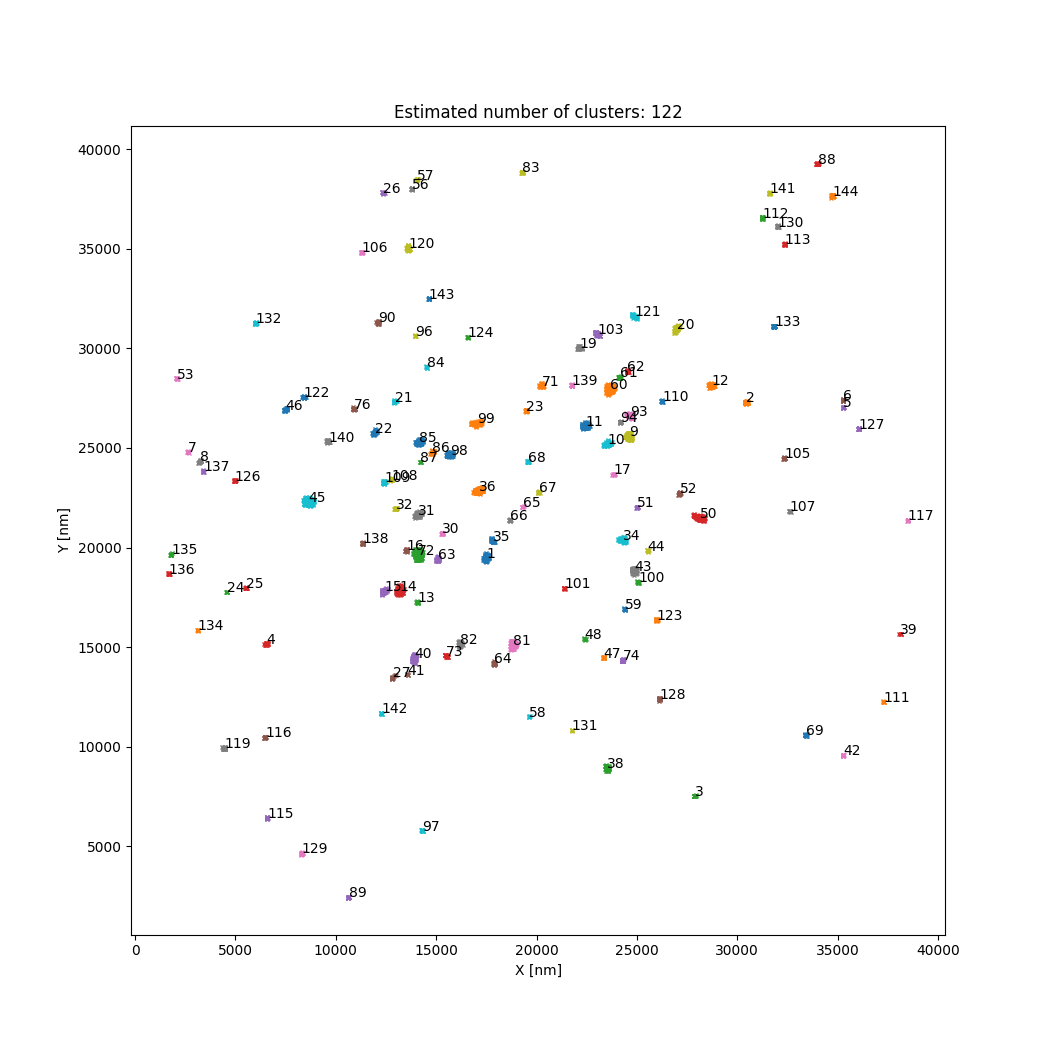

In [32]:
folder = '/home/daniel/Documents/Image Processing/Penny/PALM/WTmeos PALM higher power_filtered_out/optics_clustering'
filename = '5min_TNF3 filtered only_optics.xlsx'
basename = os.path.splitext(filename)[0]
path = os.path.join(folder,filename)

df = pd.read_excel(path, sheetname='cluster coordinates')
X = df.as_matrix(columns=['x [nm]', 'y [nm]'])

# Black removed and is used for noise instead.
unique_labels = set(df['cluster_id'])
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
plt.figure()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (df['cluster_id'].values == k)

    xy = X[class_member_mask]
    kmeans = KMeans(n_clusters=1, random_state=0).fit(xy)
    clust_center = kmeans.cluster_centers_[0]    

    plt.plot(xy[:, 0], xy[:, 1], 'x', markersize=3)
    plt.annotate('%s'%str(k),xy=(clust_center[0:2]),xycoords='data')    

plt.title('Estimated number of clusters: %d' % len(unique_labels))
plt.xlabel('X [nm]')
plt.ylabel('Y [nm]')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
fig.savefig(os.path.join(folder,basename+'_clusters.png'), dpi=100)
plt.show()

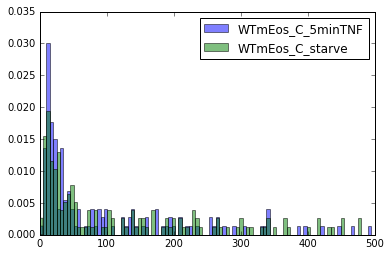

In [16]:
bins = np.linspace(0, 500, 100)
plt.hist(wt_coords['localisations per cluster'].values, bins=bins, alpha=0.5, label='WTmEos_C_5minTNF', normed=True)

plt.hist(starve_coords['localisations per cluster'].values, bins=bins, alpha=0.5, label='WTmEos_C_starve', normed=True)
plt.xlim([0,500])
plt.legend()
plt.savefig(os.path.join(output_dir,'localisations_per_cluster.png'))
plt.show()

In [1]:
# let IPython take care of processing the data in parallel
# make sure to start the engines on the cluster (go to the "Home" tab)
# first make a Client to control the engines
c = Client()

# and create a balanced view to distribute the work evenly across the cpus
lview = c.load_balanced_view()
lview.block = True
    
# create a view (essentially a subprocess)
dview = c[:]

# import the db_clustering module in the view
dview.execute('import density_based_clustering as db')


NameError: name 'Client' is not defined

In [ ]:
# parallel processing

clust_coords = []
hulls = []
areas = []
members = []

for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        filepath = os.path.join(input_dir,filename)
        basename = os.path.splitext(filename)[0]
        basepath = os.path.splitext(filepath)[0]
        coords = db.extract_coords(os.path.join(input_dir,filename))
        rois = db.extract_rois(basepath + '_rois.csv')
        data = db.extract_coords_in_rois(coords, rois, pixel_size)
        
        cluster_plot_filenames = [os.path.join(output_dir,basename+"_roi_%s.png"%r) for r in range(len(rois))]
        
        # execute processing of rois in parallel
        # time it
        sp = time.time()

        # map the anonymous function to the view
        parallel_results = dview.map_sync(db.batch_optics, data, [eps]*len(data),\
                                          [eps_extract]*len(data), [ms]*len(data), cluster_plot_filenames)

        for result in parallel_results:
            pclust_coords, phulls, pareas, plocs = result
            clust_coords.append(pclust_coords)
            hulls.append(phulls)
            areas.append(pareas)
            members.append(plocs)

        print time.time() - sp    